In [2]:
## Analysis of the titanic data
library(MASS)
library(vcd)
library(vcdExtra)

In [3]:
Titanic.raw <- data.frame( read.csv('./data/Titanic_R.csv',
             header=T, sep=',', na.strings=c(""," ","NA")) )
## Treat empty element as NA.

# pclass:     1 = 1st, 2= 2nd, 3 = 3rd 
# survived:   0 = Died, 1 = Survived
# Residence:  0 = American, 1 = British, 2 = Other
# Name
# age
# sibsp:      Number of siblings/ spouses
# parch:      Number of parents/ children on board
# Ticket:     Ticket number
# fare:       Price of ticket
# Cabin:      Cabin number
# Embarked:   Where passenger embarked
# Boat:       Boat identification (if rescued)
# Body:       Body number (if died)
# Home.dest:  Home town
# Gender:     0 = Male, 1=Female

str(Titanic.raw)

'data.frame':	1309 obs. of  15 variables:
 $ pclass   : int  3 3 3 3 3 3 2 2 3 3 ...
 $ survived : int  0 0 0 1 1 1 0 1 1 1 ...
 $ Residence: int  0 0 0 0 2 0 2 2 2 2 ...
 $ name     : chr  "Abbing, Mr. Anthony" "Abbott, Master. Eugene Joseph" "Abbott, Mr. Rossmore Edward" "Abbott, Mrs. Stanton (Rosa Hunt)" ...
 $ age      : num  42 13 16 35 16 25 30 28 20 18 ...
 $ sibsp    : int  0 0 1 1 0 0 1 1 0 0 ...
 $ parch    : int  0 2 1 1 0 0 0 0 0 0 ...
 $ ticket   : chr  "C.A. 5547" "C.A. 2673" "C.A. 2673" "C.A. 2673" ...
 $ fare     : num  7.55 20.25 20.25 20.25 7.65 ...
 $ cabin    : chr  NA NA NA NA ...
 $ embarked : chr  "S" "S" "S" "S" ...
 $ boat     : chr  NA NA NA "A" ...
 $ body     : int  NA NA 190 NA NA NA NA NA NA NA ...
 $ home.dest: chr  NA "East Providence, RI" "East Providence, RI" "East Providence, RI" ...
 $ Gender   : int  0 0 0 1 1 0 0 1 0 1 ...


pclass  survived Residence      name       age     sibsp     parch    ticket 
        0         0         0         0       263         0         0         0 
     fare     cabin  embarked      boat      body home.dest    Gender 
        1      1014         2       823      1188       564         0

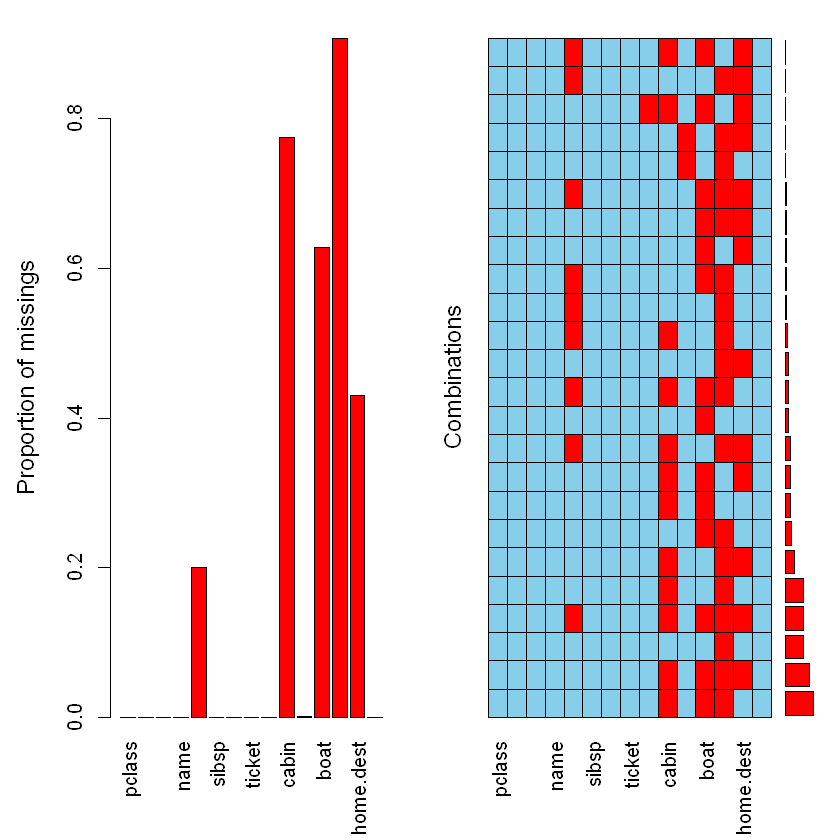

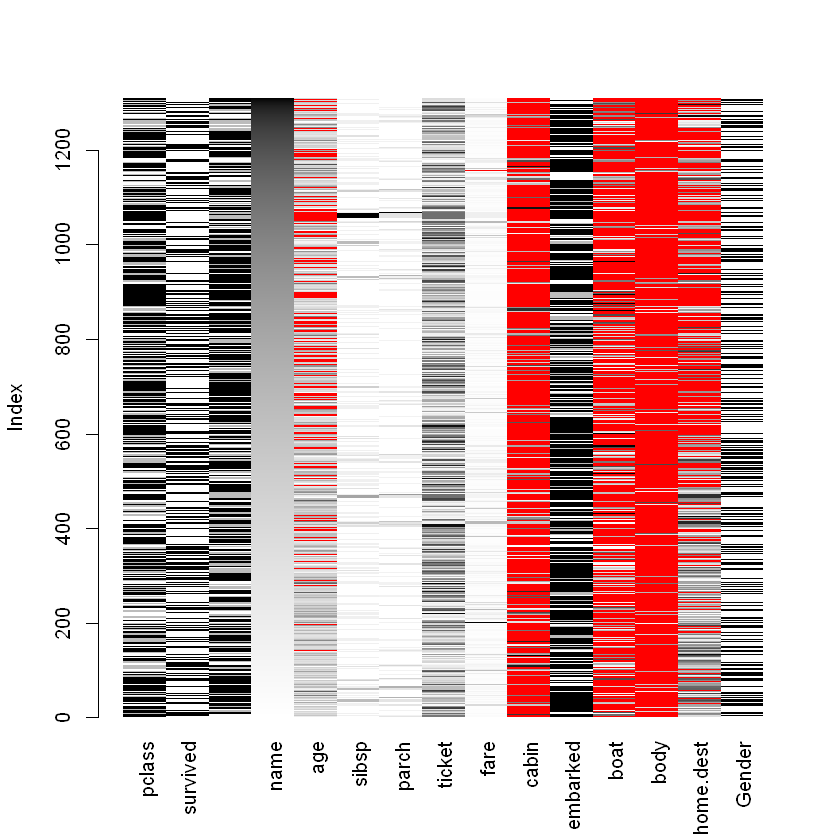

In [5]:
## Missing data issue:
colSums(is.na(Titanic.raw))

library(VIM)
aggr(Titanic.raw)
matrixplot(Titanic.raw)

In [6]:
## Drop some features (personal choice):
Titanic.v2 <- subset(Titanic.raw, 
  select = -c(name, ticket, cabin, boat, body, home.dest, embarked))
colSums(is.na(Titanic.v2))

pclass  survived Residence       age     sibsp     parch      fare    Gender 
        0         0         0       263         0         0         1         0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.1667 21.0000 28.0000 29.8811 39.0000 80.0000     263 

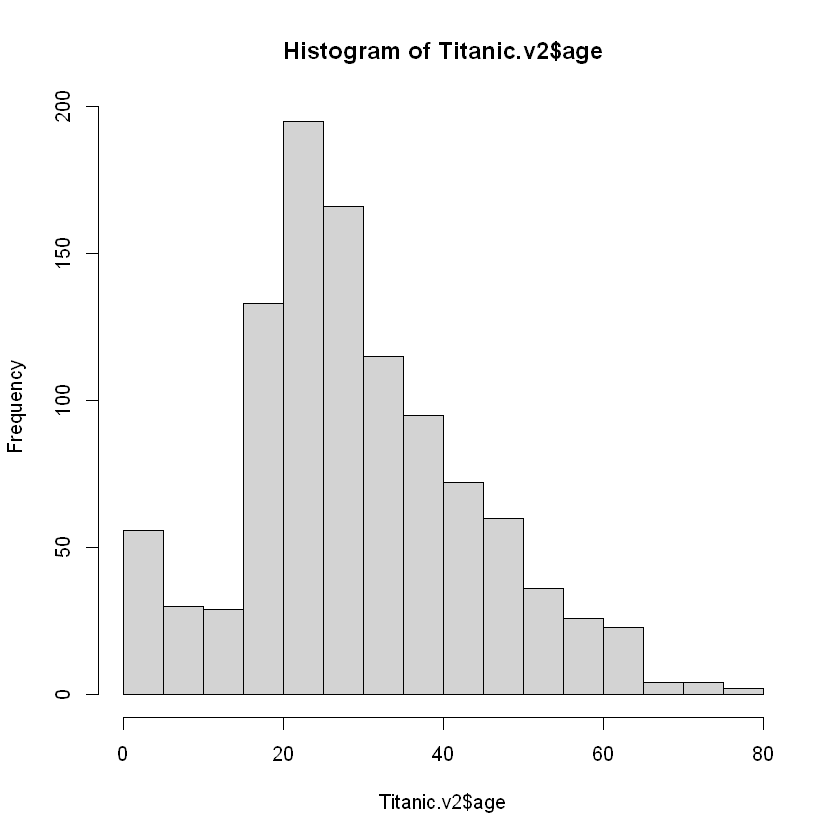

In [7]:
## Issue of age:
summary(Titanic.v2$age)
hist(Titanic.v2$age)

In [8]:
## There are still a lot of ages missing.
## We can impute the missing ages with mean/medium age by:
# Titanic <- Titanic.v2
# Titanic$age[is.na(Titanic.v2$age)] <- median(Titanic.v2$age, na.rm=T)

## For simplicity, I omit all the rows with missing data.
Titanic <- na.omit(Titanic.v2)
nrow(Titanic)
colSums(is.na(Titanic))

[1] 1045

pclass  survived Residence       age     sibsp     parch      fare    Gender 
        0         0         0         0         0         0         0         0

In [9]:
## To tell R which are factors:
Titanic$survived  <- factor(Titanic$survived, c(0,1), labels=c('Died','Survived'))
Titanic$pclass    <- factor(Titanic$pclass, c(1,2,3), labels=c('First','Second','Third'))
Titanic$Residence <- factor(Titanic$Residence, levels=c(0,1,2), labels=c('American','British','Other'))
Titanic$Gender    <- factor(Titanic$Gender, levels=c(0,1), labels=c('Male','Female'))

In [10]:
## Reserve 345 samples for testing:
set.seed(5)
test.sample <- sample.int(nrow(Titanic), 345, replace=F)
Titanic.train <- Titanic[-test.sample, ]
Titanic.test  <- Titanic[test.sample, ]

nrow(Titanic.train)
nrow(Titanic.test)

[1] 700

[1] 345

In [11]:
## Logistic regression for prediction:

## Null model:
TTN.lg0 <- glm(survived=="Survived" ~ 1, 
               data=Titanic.train, family = "binomial")

## Model with all main effects:
TTN.lg.fullLN <- glm(survived=="Survived" ~ ., 
                  data=Titanic.train, family = "binomial")

## Stepwise by AIC:
TTN.lg.AICLN <- stepAIC(TTN.lg.fullLN, 
                        direction="both", trace=FALSE)

summary(TTN.lg.AICLN)


Call:
glm(formula = survived == "Survived" ~ pclass + age + sibsp + 
    Gender, family = "binomial", data = Titanic.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2916  -0.6305  -0.4164   0.6600   2.3930  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.222533   0.390070   3.134  0.00172 ** 
pclassSecond -1.437239   0.283575  -5.068 4.01e-07 ***
pclassThird  -2.326577   0.280907  -8.282  < 2e-16 ***
age          -0.037496   0.008275  -4.531 5.86e-06 ***
sibsp        -0.331908   0.125131  -2.652  0.00799 ** 
GenderFemale  2.677880   0.210518  12.720  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 941.4  on 699  degrees of freedom
Residual deviance: 636.0  on 694  degrees of freedom
AIC: 648

Number of Fisher Scoring iterations: 4


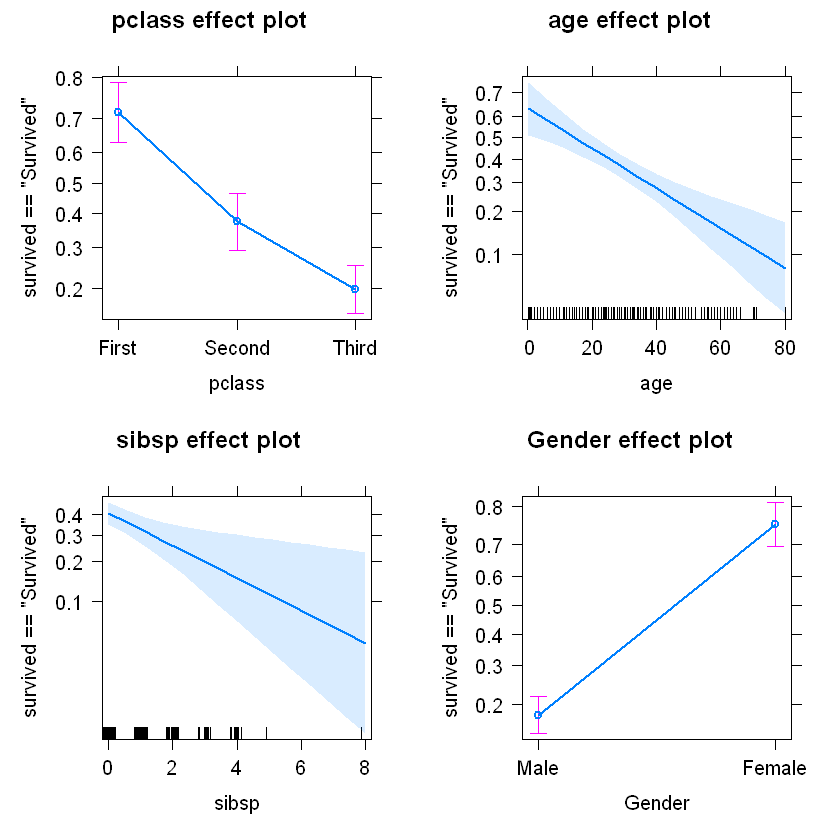

In [14]:
## Effects plots:
library(effects)
plot( allEffects(TTN.lg.AICLN) )

In [15]:
## Full model with all pair-wise interactions:
TTN.lg.fullPW <- glm(survived=="Survived" ~ (.)^2, data=Titanic.train, family = "binomial")

## Step-wise by AIC:
TTN.lg.AICPW <- stepAIC(TTN.lg.fullPW, direction="both", trace=FALSE)

In [16]:
## A simplified demo for cross-validation (see ISLR for more):

library(boot)
## Cross-validation for a few candidates models:
TTN.lg1 <- glm(survived=="Survived" ~ pclass + Gender + age, 
               data=Titanic.train, family = "binomial")
TTN.lg2 <- glm(survived=="Survived" ~ pclass + Gender + Residence, 
               data=Titanic.train, family = "binomial")
TTN.lg3 <- glm(survived=="Survived" ~ pclass * Gender + age, 
               data=Titanic.train, family = "binomial")
model.list = list(TTN.lg1, TTN.lg2, TTN.lg3)

## Define the metric (classification error) for model comparison:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)

set.seed(5)
cv.err = rep(0, 3)
for (i in 1:3){
    model <- model.list[[i]]
    glm.fit <- cv.glm(Titanic.train, model, cost=cost, K=10)
    cv.err[i] <- glm.fit$delta[[1]]
}

cv.err

[1] 0.2128571 0.2114286 0.2100000

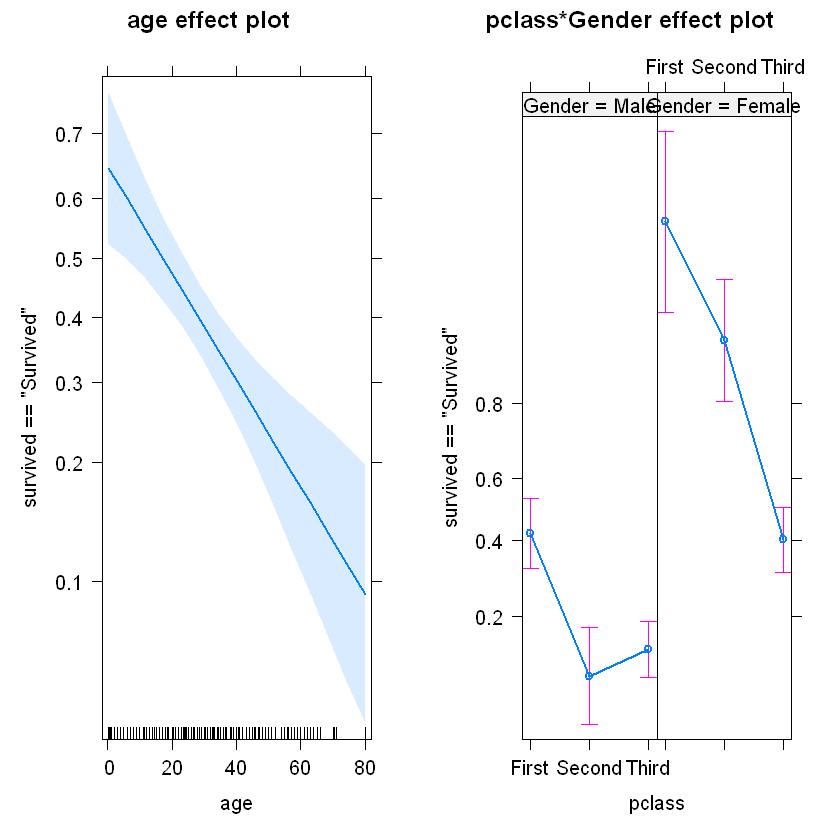

In [17]:
## Effect plots:
plot( allEffects(TTN.lg3) )

In [18]:
## A personal choice after some explorations:
TTN.lg.ps <- glm(survived=="Survived" ~ pclass * (Gender + age), 
                  data=Titanic.train, family = "binomial")

In [19]:
summary(TTN.lg.ps)


Call:
glm(formula = survived == "Survived" ~ pclass * (Gender + age), 
    family = "binomial", data = Titanic.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6797  -0.6302  -0.4982   0.3764   2.3817  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)                1.00772    0.60975   1.653 0.098399 .  
pclassSecond              -0.93635    0.89176  -1.050 0.293722    
pclassThird               -2.13964    0.68895  -3.106 0.001899 ** 
GenderFemale               4.09279    0.63974   6.398 1.58e-10 ***
age                       -0.04272    0.01510  -2.829 0.004667 ** 
pclassSecond:GenderFemale  0.73930    0.89756   0.824 0.410125    
pclassThird:GenderFemale  -2.64570    0.69317  -3.817 0.000135 ***
pclassSecond:age          -0.04102    0.02873  -1.427 0.153445    
pclassThird:age            0.02317    0.01893   1.224 0.220846    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion pa

In [20]:
LRstats(TTN.lg0, TTN.lg.AICLN, TTN.lg3, TTN.lg.ps)

AIC      BIC      LR Chisq Df  Pr(>Chisq)  
TTN.lg0      943.3994 947.9505 941.3994 699 2.132257e-09
TTN.lg.AICLN 648.0025 675.3090 636.0025 694 9.434396e-01
TTN.lg3      617.9693 649.8269 603.9693 693 9.935073e-01
TTN.lg.ps    615.4730 656.4328 597.4730 691 9.956177e-01

In [21]:
## Define a function to compute prediction accuracy:
cal.accuray <- function(model, data){
    pred.prob  <- predict(model, newdata=data, type="response")
    pred.label <- ifelse(pred.prob > 0.5, "Survived", "Died")
    mean(pred.label == data$survived)
}

In [22]:
## Training and test accuraries:
cal.accuray(TTN.lg.ps, Titanic.train)
cal.accuray(TTN.lg.ps, Titanic.test)

[1] 0.7928571

[1] 0.8

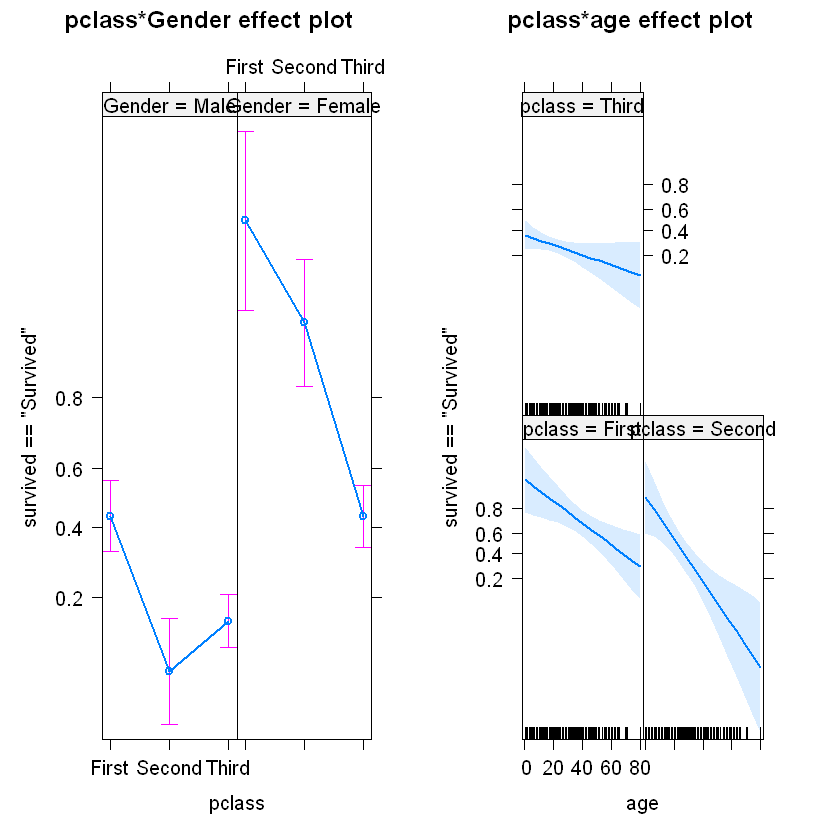

In [23]:
## For simple models, the effects are relatively easy to interpret.
plot( allEffects(TTN.lg.ps) )

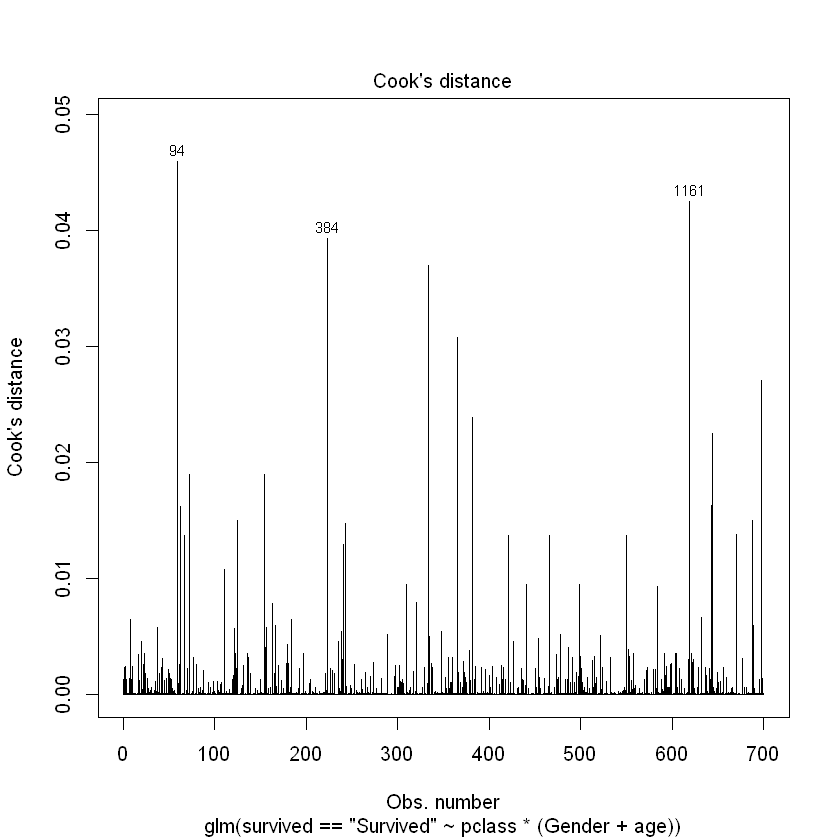

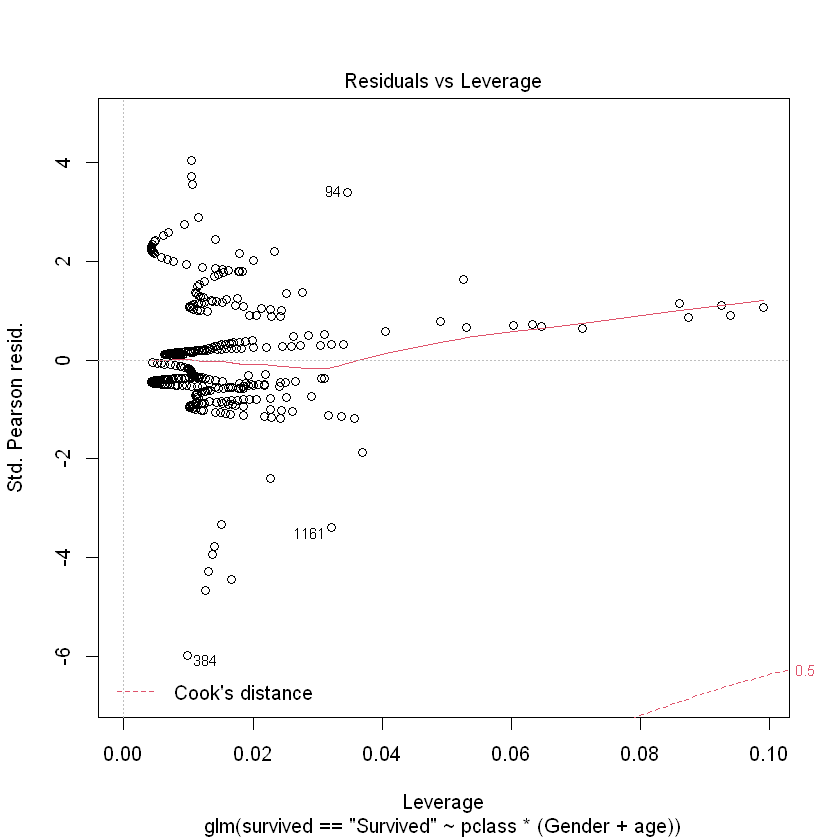

In [24]:
## Basic diagnostic:
plot(TTN.lg.ps, which=c(4, 5))

StudRes   Hat         CookD     
94    2.321926 0.034608874 0.04594328
107   1.228901 0.099202458 0.01375297
384  -2.744265 0.009832682 0.03928117
635  -2.547001 0.012634648 0.03074924
757   1.228901 0.099202458 0.01375297
1161 -2.315223 0.032202348 0.04249000

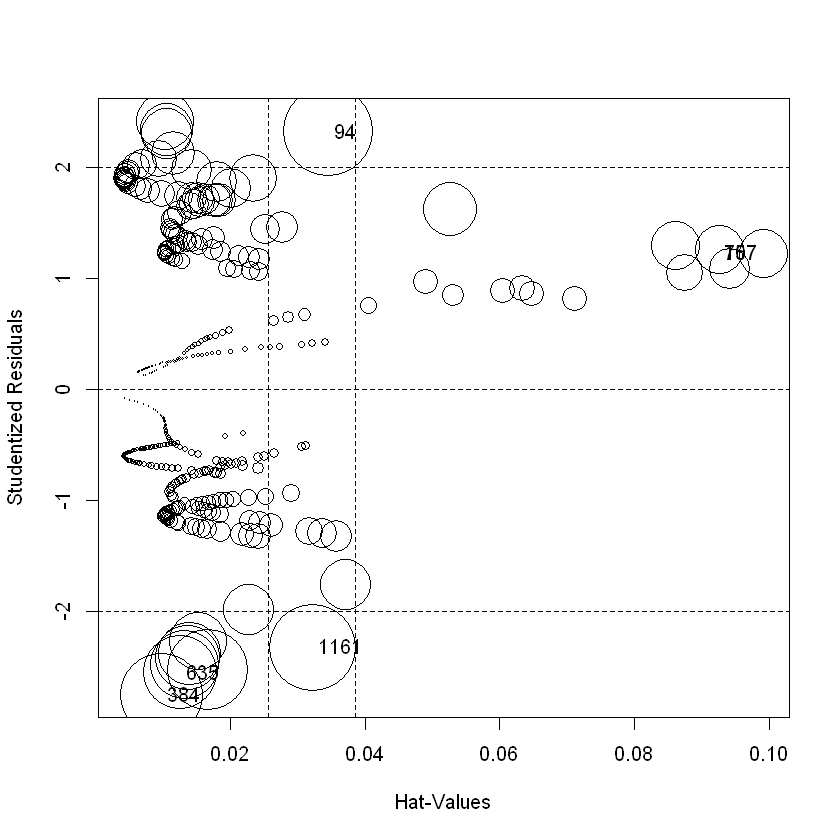

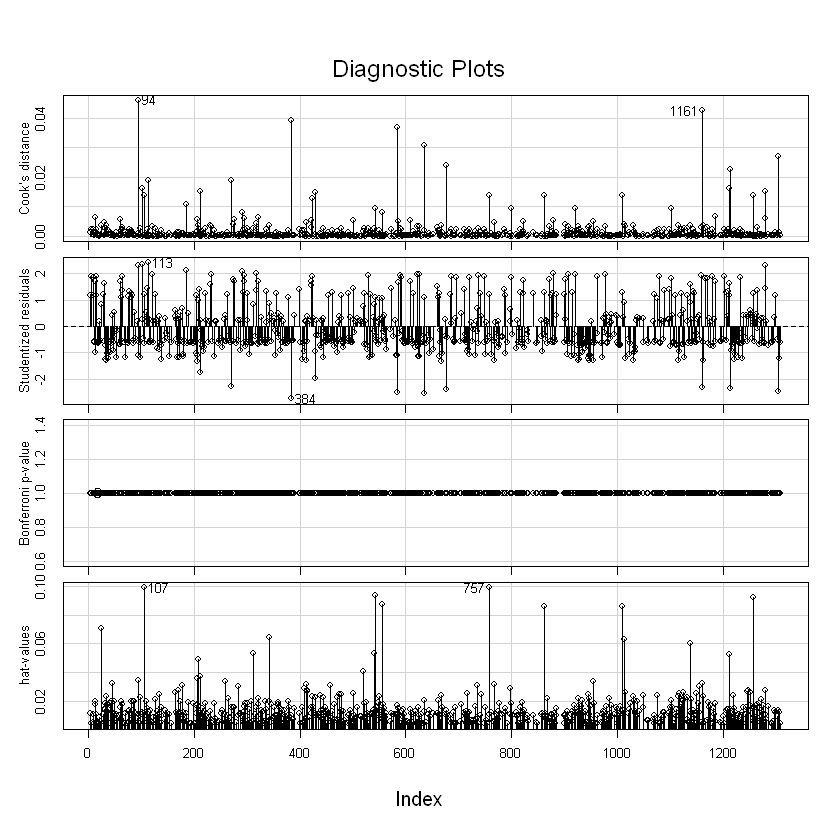

In [26]:
## To investigate possible influential point:

library(car)

## Influence plot (residual vs. leverage), 
## showing Cook’s D as the size of the bubble:
influencePlot(TTN.lg.ps)

influenceIndexPlot(TTN.lg.ps)

In [27]:
## Notice the behaviour of indexing for subsetted:
Titanic.train[5,]
Titanic.train["5",]

## Print out some influence data found by influencePlot
## (though not so influential)
Titanic.train[c("94", "107", "384", "635", "757", "1161"),]

pclass survived Residence age sibsp parch fare Gender
11 Third  Died     Other     30  0     0     7.25 Male

pclass survived Residence age sibsp parch fare Gender
5 Third  Survived Other     16  0     0     7.65 Female

pclass survived Residence age sibsp parch fare     Gender
94   First  Survived British   80  0     0      30.0000 Male  
107  Second Survived Other      1  2     1      39.0000 Male  
384  First  Died     American  36  0     0      31.6792 Female
635  Second Died     American  22  0     0      21.0000 Female
757  Second Survived Other      1  0     2      37.0042 Male  
1161 First  Died     American  63  1     0     221.7792 Female

In [28]:
## Checking multicollinearity:
library(car)
vif(TTN.lg.ps)
sqrt(5)
sqrt(10)

GVIF      Df GVIF^(1/(2*Df))
pclass        49.150806 2  2.647785       
Gender         8.864377 1  2.977310       
age            4.229148 1  2.056489       
pclass:Gender 21.127439 2  2.143935       
pclass:age    50.305423 2  2.663200

[1] 2.236068

[1] 3.162278

[1] 0.8483846

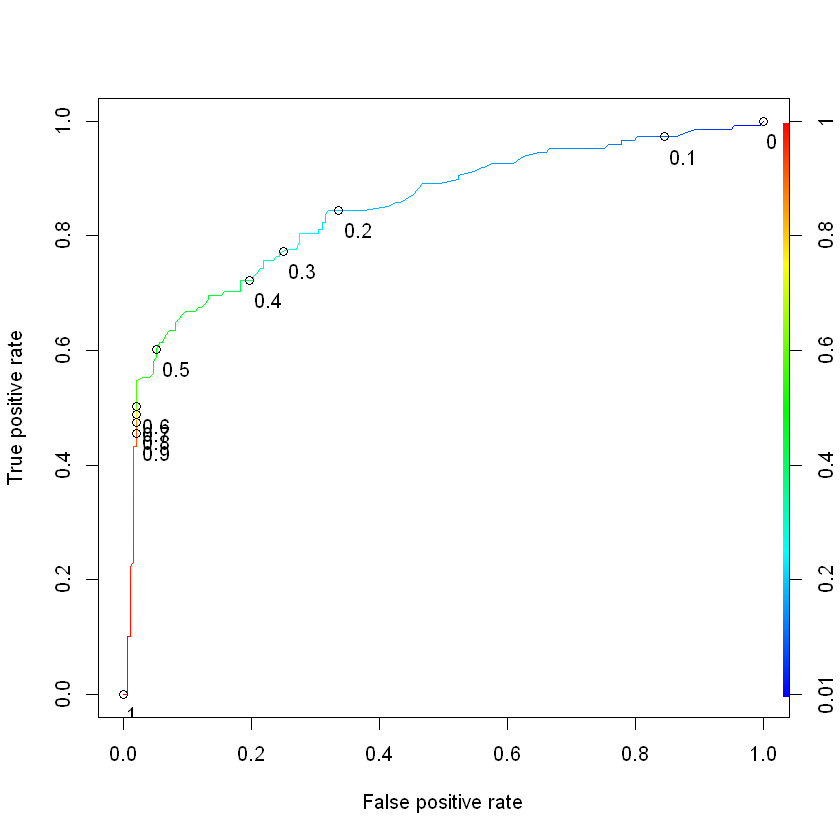

In [30]:
library(ROCR)

pred.prob <- predict(TTN.lg.ps, newdata=Titanic.test, 
                     type="response")

## Two functions from ROCR:
pred <- prediction(pred.prob, Titanic.test$survived)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")

## ROC curve:
plot(perf, colorize = TRUE, text.adj = c(-0.2, 1.7), 
     print.cutoffs.at = seq(0,1,0.1))

## AUC:
perf.auc <- performance(pred, measure="auc")
perf.auc@y.values[[1]]